<a href="https://colab.research.google.com/github/Sumana-ghosh/Global_Superstore_Analysis_PowerBi/blob/main/SG_edit_TEAM_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project on Hotel Booking Analysis - Team Notebook**

## **Overview of the Problem Statement**

> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

> This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. Explore and analyze the data to discover important factors that govern the bookings.

> **Note:** All personally identifying information has been removed from the data.

###**Project Objective:**
>The goal of this exploratory data analysis (EDA) project is to explore and analyze the data to draw useful insights and discover important factors that govern hotel bookings. We feel that such kind of EDA can help hotels to analyze their business models and modify them, if required.

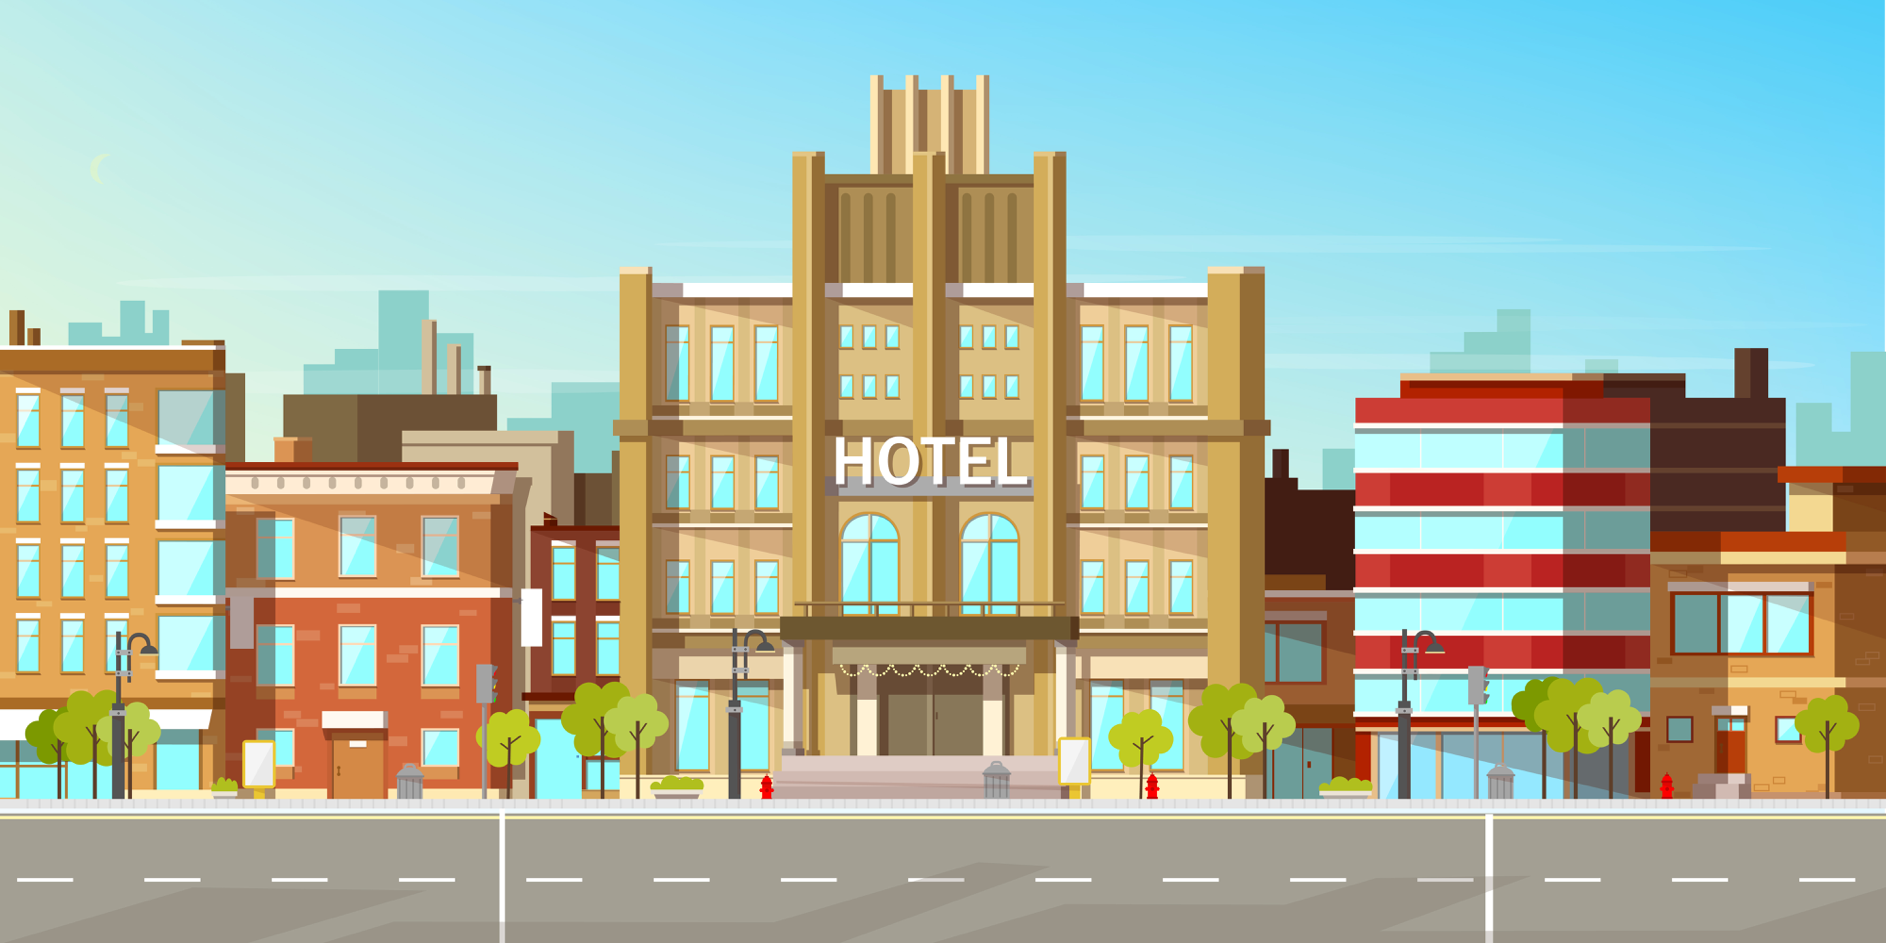

# **Introduction**


> The hotel industry is a very volatile and the bookings depend on various factors, including the hotel type, seasonality, day of the week, and many more. This makes analyzing the patterns available in the past data more important to help the hotels plan better. By analyzing historical data, hotels can predict their performance and can launch campaigns to boost their business. 

> Hence, in this project, we have tried to analyse the different variables associated with hotel booking and discover out some important and interesting insights that govern hotel bookings.

> In summary, the steps we have performed in this project to analyze our data are as follows:

*   Importing the data and the different python libraries 
*   Exploring and understanding the data
*   Cleaning and preparing the data 
*   Performing exploratory data analysis to draw insights


## Importing the data and the different python libraries

In [2]:
# Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import folium 
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Storing the path in a variable
file_path = '/content/drive/MyDrive/Capstone Project File/Hotel Bookings.csv'

# Reading the file path
data=pd.read_csv(file_path,index_col=0) 

## Exploring the data

In [5]:
# Setting how many columns to display
pd.set_option('display.max_columns',40)

In [6]:
# Looking at the data
data.sample(10)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
hotel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
City Hotel,1,44,2017,April,15,15,2,1,2,0.0,0,BB,LUX,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,146.67,0,0,Canceled,2017-03-02
Resort Hotel,1,72,2016,February,6,6,2,1,2,0.0,0,HB,PRT,Groups,Direct,0,0,0,D,D,0,No Deposit,NaN,NaN,0,Transient-Party,73.33,0,0,Canceled,2016-01-19
Resort Hotel,1,168,2016,April,16,12,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,245.0,NaN,0,Transient,86.00,0,0,Canceled,2016-01-05
City Hotel,0,0,2016,April,16,15,1,2,2,1.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,9.0,NaN,0,Transient,119.00,0,0,Check-Out,2016-04-18
City Hotel,1,72,2016,May,19,1,2,1,3,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,159.30,0,2,Canceled,2016-02-23
City Hotel,1,384,2016,July,30,20,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,65.00,0,0,Canceled,2016-02-29
Resort Hotel,0,0,2016,February,10,29,1,3,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,2,A,A,1,No Deposit,NaN,47.0,0,Transient,30.00,0,0,Check-Out,2016-03-04
Resort Hotel,1,344,2017,June,22,1,3,8,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,243.0,NaN,0,Contract,68.40,0,0,Canceled,2017-03-29
City Hotel,1,66,2017,April,15,9,2,0,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,NaN,NaN,0,Transient,100.00,0,0,Canceled,2017-02-02


In [7]:
data.reset_index(inplace=True)

In [8]:
#getting information about the different columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
#looking at the number of rows and columns in the data
data.shape

(119390, 32)

In [10]:
#checking the number of unique values for each column
data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [11]:
#getting the statistical analysis of the numerical columns
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [12]:
# Checking all the columns with categorical data .

cat_cols = list(data.select_dtypes(include='object').columns)
print(f'Categorical columns: {cat_cols}')
print(f"Number of categorical columns:{len(cat_cols)}")

Categorical columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
Number of categorical columns:12


In [13]:
# Checking all the columns with numerical data .

num_cols = list(data.select_dtypes(exclude='object').columns)
print(f'Numeric columns: {num_cols}')
print(f"Number of numeric columns:{len(num_cols)}")

Numeric columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Number of numeric columns:20


## The description of the different columns present in this dataset are as follows :

* hotel
  *  Resort hotel
  *  City hotel
* is_canceled
  * 1: Canceled
  * 0: Not canceled
* lead_time: Number of days that elapsed between entering the date of booking into the property management system (PMS) and the arrival date
* arrival_date_year
* arrival_date_month
* arrival_date_week_number
* arrival_date_day_of_month
* Day of arrival date
* stays_in_weekend_nights: Number of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel
* stays_in_week_nights: Number of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel
* Adults
* Children
* Babies
* meal:Type of meal booked. Includes: 
   * Undefined/SC – no meal package
   * BB – Bed & Breakfast
   * HB – Half board (breakfast and one other meal – usually dinner)
   * FB – Full board (breakfast, lunch, and dinner)
* country
* market_segment
  * TA: Travel agents
  * TO: Tour operators
* distribution_channel: A chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer.
  * TA: Travel agents
  * TO: Tour operators
* is_repeated_guest: Value indicating if the booking name was from a guest who have stayed at the hotel before
  * 1: Yes
  * 0: No
* previous_cancellations: Number of previous bookings cancelled by the customer before the current booking
* previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer before the current booking
* reserved_room_type: Code of the room type reserved. Code is presented instead of designation to maintain anonymity.
* assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation to maintain anonymity.
* booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
* deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: 
  * No Deposit – no deposit was made
  * Non Refund – a deposit was made in the value of the total stay cost
  * Refundable – a deposit was made with a value under the total cost of stay.
* agent: ID of the travel agency that made the booking
* company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
* day_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer
* customer_type
  * Contract - when the booking has an allotment or other type of contract associated to it
  * Group – when the booking is associated to a group
  * Transient – when the booking is not part of a group or contract, and is not associated to other transient booking
  * Transient-party – when the booking is transient, but is associated to at least other transient booking
* adr (average daily rate): Indicates the average revenue earned for an occupied room on a given day
* required_car_parking_spaces: Number of car parking spaces required by the customer
* total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)
* reservation_status
  * Canceled – booking was canceled by the customer;
  * Check-Out – customer has checked in but already departed;
  * No-Show – customer did not check-in and did inform the hotel of the reason why
* reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the reservation_status to understand when was the booking canceled or when did the customer check-out of the hotel



## Cleaning and preparing the dataset

> Cleaning data is one of the most important part of EDA. Data cleaning entails many steps, including the following: 

1.  Removing duplicate rows
2.  Handling missing or null values
3.  Converting data to appropriate data types
4.  Adding calculated columns to the dataset

In [14]:
# Creating a copy of dataset before cleaning
df = data.copy()

### Step-1: Removing duplicate rows


In [15]:
#Looking at the number of duplicate rows
df[df.duplicated()].shape

(31994, 32)

Since there are 31994 duplicate rows out of 119390 rows, we will remove these rows in the next step.

In [16]:
#dropping the duplicate rows
df.drop_duplicates(inplace=True)
df.shape

(87396, 32)

After removing the duplicate rows, we are left with 87396 rows in the dataset.

### Step-2: Handling missing values

In [17]:
# Counting the null values present in each column
null_values = df.isnull().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'Columns',0:'Number of Null values'})

In [18]:
# Counting the null value % in each column
null_values_pct = (df.isna().sum().sort_values(ascending=False)*100)/len(df)
null_values_pct = null_values_pct.reset_index().rename(columns={'index':'Columns',0:'% of Null values'})

In [19]:
pd.merge(null_values,null_values_pct)

,Columns,Number of Null values,% of Null values
0,company,82137,93.982562
1,agent,12193,13.951439
2,country,452,0.517186
3,children,4,0.004577
4,reserved_room_type,0,0.000000
5,assigned_room_type,0,0.000000
6,booking_changes,0,0.000000
7,deposit_type,0,0.000000
8,hotel,0,0.000000
9,previous_cancellations,0,0.000000


###Inferences:
1. There are four columns with null values.
2. These columns are : 
*   company
*   agent
*   country
*   children

###Action Plan:
1. We plan to drop the "company" column since it has ~94% null values
2. For the "country" column, we plan to replace the missing values with "Others"
3. For the "children" column, we will replace the missing values with 0 
4. For the "agents" column, we will replace null with 0, where agent ID = 0 represents that the guests booked the hotel themselves without the assistance of an agency. 

In [20]:
# Dropping the "company" column
df = df.drop(columns=['company'])

# Replacing all null values from "country" column to 'others' 
df['country'].fillna('others',inplace=True)

# Replacing all null values in "children" column to 0
df['children'].fillna(0 , inplace = True)

# Replacing all null values in "agent" column to 0
df['agent'].fillna(0 , inplace = True)

#Checking if all null values are removed
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

###Step-3 : Converting data to appropriate data type
> In the data info, we observed that the data in the "children" column is in float type. Hence, we plan to convert it to integer type.

In [21]:
#changing the data type
df['children'] = df['children'].astype('int64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

### Step-4: Adding calculated columns to the dataset

In [23]:
# Adding the "total_stays" column 
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Adding the "total_guest" column
df['total_guest'] = df['adults'] + df['children'] + df['babies']

# Adding new column for the month and year combination data
df["arrival_date_month_year"]=df["arrival_date_month"].astype("str")+" "+df["arrival_date_year"].astype("str")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

For bookings that are not canceled, the total number of stays and total number of guests must not be zero (ideally). Hence, we plan to drop those rows from the dataset.

In [25]:
df.shape

(87396, 34)

In [26]:
#number of rows where total_guest is 0 for non-canceled bookings
df[(df['total_guest'] == 0) & (df['is_canceled']== 0)].shape

(150, 34)

In [27]:
# filtering all rows where total_guest is 0 for non-canceled bookings
df = df.loc[~((df['total_guest'] == 0) & (df['is_canceled']== 0)),:]

In [28]:
# checking if 150 rows are dropped
df.shape

(87246, 34)

In [29]:
#number of rows where total_stays is 0 for non-canceled bookings
df[(df['total_stays'] == 0) & (df['is_canceled']== 0)].shape

(568, 34)

In [30]:
# filtering all rows where total_stays is 0 for non-canceled bookings
df = df.loc[~((df['total_stays'] == 0) & (df['is_canceled']== 0)),:]

In [31]:
# checking if additional 568 rows are dropped
df.shape

(86678, 34)

## Now we plan to perform an EDA on the data to draw insights

>Before we start an EDA, we will create a new dataframe 'hotel_df' containing only non-canceled bookings for use in some of the analyses. 

>For analyses where we need both the canceled and non-canceled bookings, we will use the dataframe 'df'

In [32]:
# creating a dataframe by filtering the booking canceled data in the cleaned 'df' dataframe
hotel_df = df[df['is_canceled']== 0]

In [33]:
hotel_df.shape

(62653, 34)

In [34]:
#setting a common title size and weight for all figures
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.titleweight"] = 'bold'

###**Question 1: Are there any correlation between the different columns?** 

Text(0.5, 1.0, 'Heatmap showing the correlation between different numerical columns')

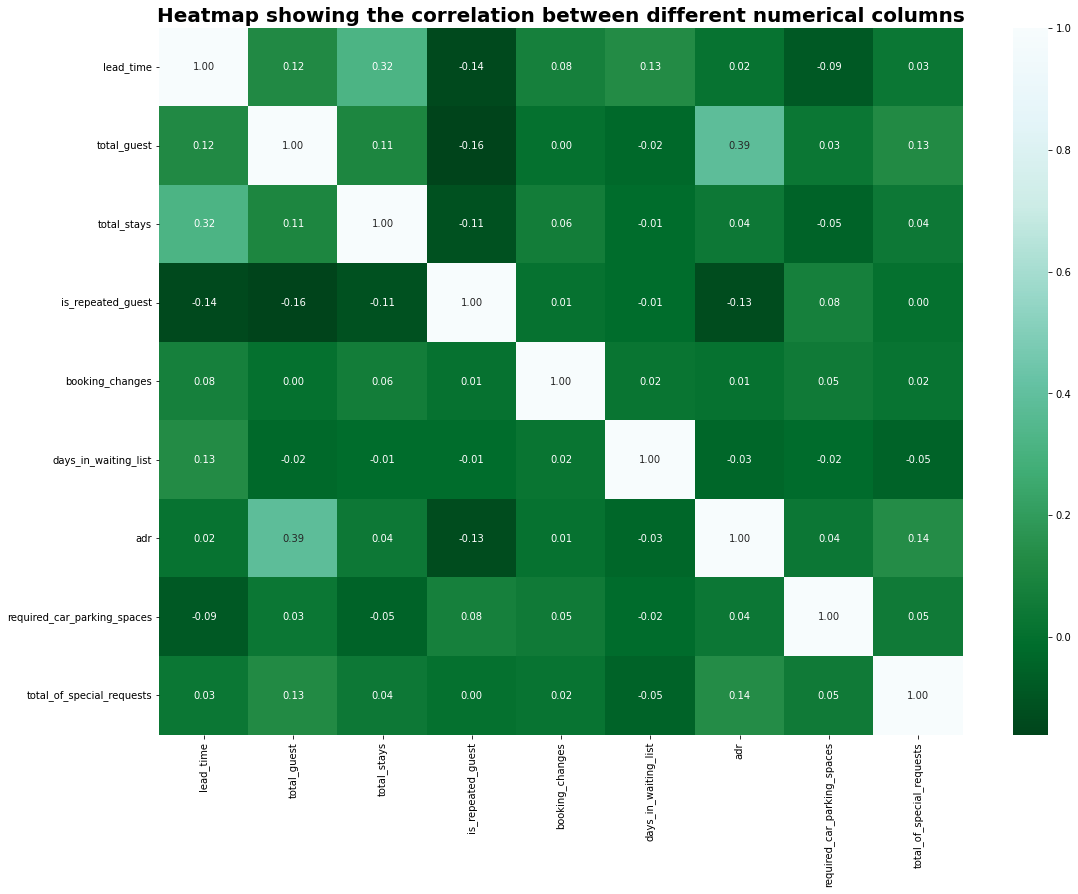

In [35]:
#plotting a correlation heatmap
plt.figure(figsize=(18,13))
columns_df= df[['lead_time','total_guest','total_stays','is_repeated_guest','booking_changes','days_in_waiting_list','adr',
       'required_car_parking_spaces', 'total_of_special_requests']]
sns.heatmap(columns_df.corr(),annot=True,fmt = '.2f',cmap= 'BuGn_r')
plt.title("Heatmap showing the correlation between different numerical columns")

### **Inference:** 
>The relationships between variables showing a moderate positive correlation (0.3-0.5) are as follows:
*   ADR and total number of guests
*   lead time and total stay



###**Question 2 : Which hotel is more preferred among guests?** 
>Here, we plan to check among the two hotel types in this dataset, which one is more preferred.

Text(0.5, 1.0, 'Most preferred hotel type among guests')

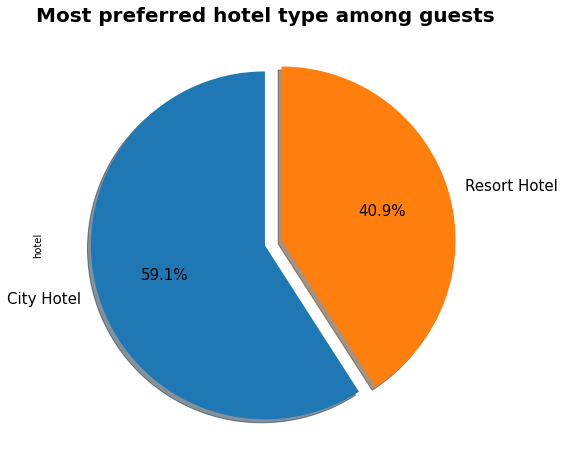

In [36]:
# Plotting a pie chart. Note: autopct shows percentage of value and the start angle is 90 degrees
hotel_df['hotel'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',startangle=90, textprops={'fontsize': 18}, shadow=True, figsize=(8,8),fontsize= 15)
plt.title('Most preferred hotel type among guests')   

### **Inference:** 

*   Through the above pie chart we show that city hotel is more preferred  compared to resort hotel.
*   59.1 % guests have booked the city hotel while 40.9% guests go with resort hotel.
    > **Note:** These statistics apply to the non-canceled bookings.


### **Question 3: What are the room-type preferences of the guests?**



In [37]:
#looking at room type preference for non-canceled bookings
room_type_by_hotel = hotel_df.groupby('reserved_room_type')['hotel'].value_counts().unstack().reset_index()
room_type_by_hotel

hotel,reserved_room_type,City Hotel,Resort Hotel
0,A,26873.0,14473.0
1,B,671.0,3.0
2,C,8.0,603.0
3,D,7041.0,5021.0
4,E,998.0,3357.0
5,F,1071.0,883.0
6,G,359.0,939.0
7,H,NaN,349.0
8,L,NaN,4.0


In [38]:
dfr = room_type_by_hotel.melt('reserved_room_type', var_name='cols', value_name='vals')
dfr

,reserved_room_type,cols,vals
0,A,City Hotel,26873.0
1,B,City Hotel,671.0
2,C,City Hotel,8.0
3,D,City Hotel,7041.0
4,E,City Hotel,998.0
5,F,City Hotel,1071.0
6,G,City Hotel,359.0
7,H,City Hotel,NaN
8,L,City Hotel,NaN
9,A,Resort Hotel,14473.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

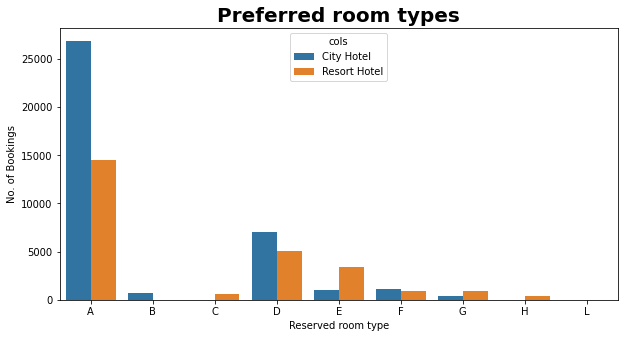

In [39]:
plt.rcParams['figure.figsize'] = (10,5)
#room_type_by_hotel.plot(kind='bar')
sns.barplot(x= "reserved_room_type",y="vals",hue='cols',data=dfr)
plt.title('Preferred room types')
plt.xlabel('Reserved room type')
plt.ylabel('No. of Bookings')
plt.xticks(rotation=0)

###**Inference:**

>Room type A is the most preferred room in both city and resort hotels among the non-canceled bookings.



### **Question 4 : Which hotel generates more revenue?**

In [40]:
#writing a function to display values over bar plot
def bar_graph_plot(splot):
  sns.set_style("whitegrid")
  for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Text(0.5, 1.0, 'Revenue by hotel type')

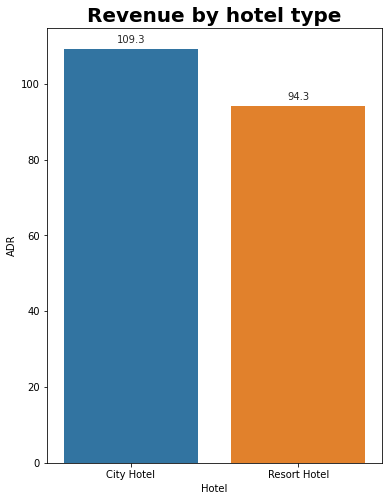

In [41]:
# Calculating average adr of each hotel.
adr_mean = hotel_df.groupby('hotel')['adr'].mean().reset_index()

# Plotting a bar graph on adr data using the mean adr
plt.figure(figsize=(6,8))
splot = sns.barplot(x=adr_mean['hotel'],y=adr_mean['adr'])
bar_graph_plot(splot)
plt.xlabel('Hotel') 
plt.ylabel('ADR')
plt.title('Mean ADR by hotel type')

###**Inference:**

>The mean adr for all rooms in city and resort hotels are 109.3 and 94.3, respectively, for non-canceled bookings.

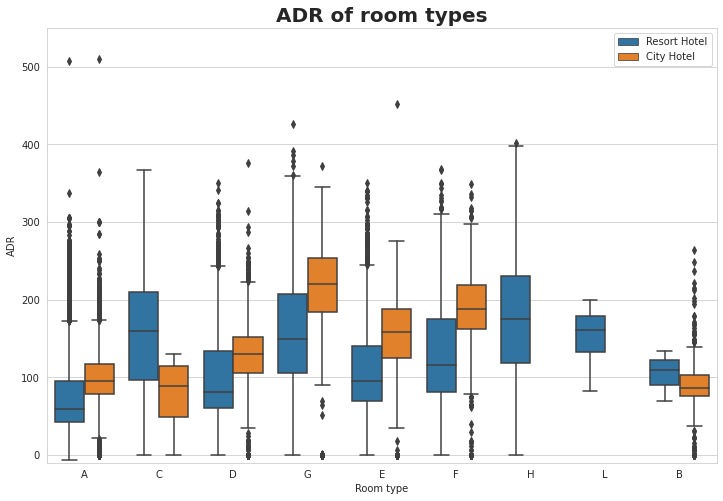

In [42]:
#adr range for each room type in city and resort hotels
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",y="adr",hue="hotel",data= hotel_df)
plt.title("ADR of room types")
plt.xlabel("Room type")
plt.ylabel("ADR")
plt.legend(loc="upper right")
plt.ylim(-10, 550)
plt.show()

###**Inference:**

>For non-canceled bookings, room type H shows the highest median adr for resort hotel while room type G shows the highest median adr for city hotel. Further, the adr's of most room types vary a lot around the median, as shown by the presence of outliers.


### **Question 5: Cancellation rate by hotel type**

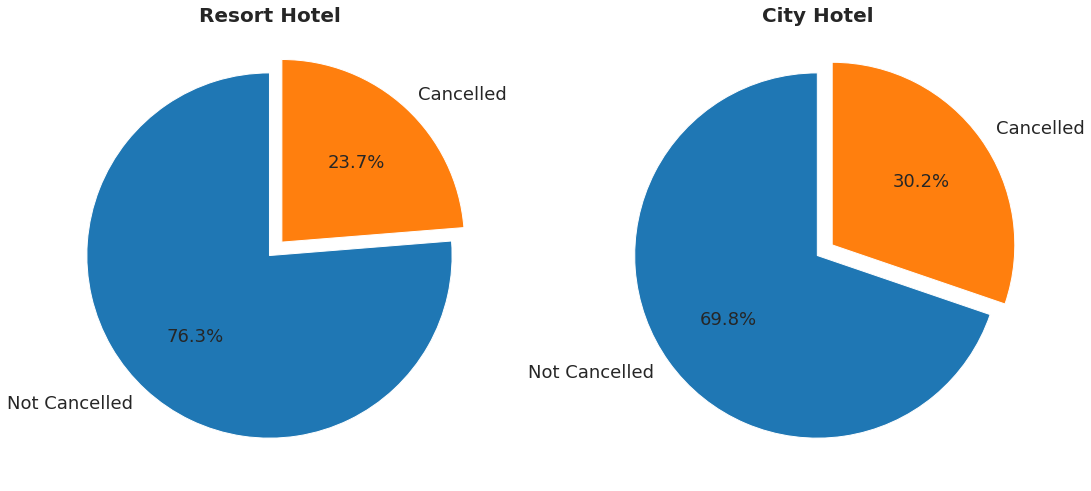

In [43]:
# Plotting pie chart side by side 
plt.figure(figsize=(18,18))

plt.subplot(1,2,1)
plt.pie(df[df['hotel']=='Resort Hotel']['is_canceled'].value_counts(),labels = ["Not Cancelled","Cancelled"], explode= (0, 0.1), autopct = '%1.1f%%', textprops={'fontsize': 18},startangle=90)
plt.title('Resort Hotel')
plt.subplot(1,2,2)
plt.pie(df[df['hotel']=='City Hotel']['is_canceled'].value_counts(),labels = ["Not Cancelled","Cancelled"], explode= (0, 0.1), autopct = '%1.1f%%', textprops={'fontsize': 18},startangle=90)
plt.title('City Hotel')
plt.show()

###**Inference:**

>For resort hotel, the percentages of canceled and non-canceled bookings are 23.7 % and 76.3 %, respectively.

> For city hotel, the percentages of canceled and non-canceled bookings are 30.2 % and 69.8 %, respectively.

>Hence, city hotel shows a higher cancellation rate than resort hotel.

### **Question 6: Monthly cancellation trend between city and resort hotels.**

In [44]:
# Creating two empty list . 
pct_resort=[]
pct_city=[]
# Calculating individual monthly cancellation rate of hotel .
for month_year in df["arrival_date_month_year"].unique():
  count0_resort=0
  count1_resort=0
  count0_city=0
  count1_city=0
  for i in range(len(df)):
    if (df["is_canceled"][i]==0)&(df["arrival_date_month_year"][i]==month_year)&(df["hotel"][i]=="Resort Hotel"):
      count0_resort+=1
    elif (df["is_canceled"][i]==1)&(df["arrival_date_month_year"][i]==month_year)&(df["hotel"][i]=="Resort Hotel"):
      count1_resort+=1
    if (df["is_canceled"][i]==0)&(df["arrival_date_month_year"][i]==month_year)&(df["hotel"][i]=="City Hotel"):
      count0_city+=1
    elif (df["is_canceled"][i]==1)&(df["arrival_date_month_year"][i]==month_year)&(df["hotel"][i]=="City Hotel"):
      count1_city+=1  
  pct_resort.append(count1_resort/(count0_resort+count1_resort)*100)
  pct_city.append(count1_city/(count0_city+count1_city)*100)

KeyError: ignored

In [ ]:
#plotting a line chart . 
plt.rcParams['figure.figsize' ]= 12,6
plt.plot(df["arrival_date_month_year"].unique(),pct_resort)
plt.plot(df["arrival_date_month_year"].unique(),pct_city)
plt.legend(["Resort Hotel","City Hotel"])
plt.xticks(rotation=60)
plt.yticks(np.arange(0,70, step=5))
plt.ylabel("Cancelation Rate (%)")
plt.title('Monthly cancellation trend between two hotels', fontsize = 15)
plt.grid()

### **Inference:**
>

### **Question 7: Correlation between cancellation and lead time.**

In [45]:
#correlation between cancellation and lead time
cancel_df = df.groupby('lead_time').agg({'is_canceled': ['sum','count']})
cancel_df.columns = ['cancel_sum','cancel_count']
cancel_df = cancel_df.reset_index()
cancel_df['cancel_pct'] = (cancel_df['cancel_sum']*100)/cancel_df['cancel_count']
cancel_df

,lead_time,cancel_sum,cancel_count,cancel_pct
0,0,353,5697,6.196244
1,1,214,3152,6.789340
2,2,182,1900,9.578947
3,3,170,1694,10.035419
4,4,154,1554,9.909910
...,...,...,...,...
473,615,2,2,100.000000
474,622,2,2,100.000000
475,626,1,1,100.000000
476,629,2,2,100.000000


In [46]:
correlation = cancel_df['lead_time'].corr(cancel_df['cancel_pct'])
correlation

0.5632955715604824

<Figure size 1080x1080 with 0 Axes>

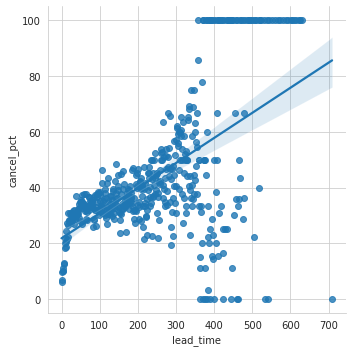

In [47]:
plt.figure(figsize=(15,15))
sns.lmplot(x='lead_time',y='cancel_pct', data=cancel_df)

### **Inference:** 
> There is a positive correlation between lead time and cancellation since the correlation plot shows a straight line with a positive slope.

### **Question 8: Month-wise booking analysis for both hotels.**

In [48]:
#creating a table illustrating the booking count of each month for the different years
booked_data = hotel_df.groupby(['arrival_date_month','arrival_date_year'])['hotel'].count().unstack()
booked_data = booked_data.reset_index()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
booked_data['arrival_date_month'] = pd.Categorical(booked_data['arrival_date_month'],categories=months,ordered=True) 
booked_data = booked_data.sort_values('arrival_date_month')
booked_data.set_index("arrival_date_month", inplace = True)
booked_data

arrival_date_year,2015,2016,2017
arrival_date_month,,,
January,NaN,1525.0,2079.0
February,NaN,2250.0,2375.0
March,NaN,2908.0,2705.0
April,NaN,2731.0,2736.0
May,NaN,2799.0,3057.0
June,NaN,2578.0,2792.0
July,1140.0,2732.0,2921.0
August,1857.0,2952.0,2763.0
September,2258.0,2761.0,NaN


In [49]:
#replacing the null values with 0
booked_data.fillna(0,inplace = True)

#finding the total booking count for each month
booked_data.loc[:,'Total'] = booked_data.sum(axis=1)
booked_data

arrival_date_year,2015,2016,2017,Total
arrival_date_month,,,,
January,0.0,1525.0,2079.0,3604.0
February,0.0,2250.0,2375.0,4625.0
March,0.0,2908.0,2705.0,5613.0
April,0.0,2731.0,2736.0,5467.0
May,0.0,2799.0,3057.0,5856.0
June,0.0,2578.0,2792.0,5370.0
July,1140.0,2732.0,2921.0,6793.0
August,1857.0,2952.0,2763.0,7572.0
September,2258.0,2761.0,0.0,5019.0


In [50]:
#calculating the mean booking count for each month
#note: July (6) and August (7) are the only months having data for all three years,
#whereas the rest of the months have data for only two years. Hence, the mean booking
#count needs to be calculated accordingly.

mean_list = []

for i in range(booked_data.shape[0]):
  if i == 6 or i == 7:
    mean_list.append(round((booked_data.iloc[i,3])/3,1))
  else :
    mean_list.append(round((booked_data.iloc[i,3])/2,1))

booked_data['mean'] = mean_list
booked_data

arrival_date_year,2015,2016,2017,Total,mean
arrival_date_month,,,,,
January,0.0,1525.0,2079.0,3604.0,1802.0
February,0.0,2250.0,2375.0,4625.0,2312.5
March,0.0,2908.0,2705.0,5613.0,2806.5
April,0.0,2731.0,2736.0,5467.0,2733.5
May,0.0,2799.0,3057.0,5856.0,2928.0
June,0.0,2578.0,2792.0,5370.0,2685.0
July,1140.0,2732.0,2921.0,6793.0,2264.3
August,1857.0,2952.0,2763.0,7572.0,2524.0
September,2258.0,2761.0,0.0,5019.0,2509.5


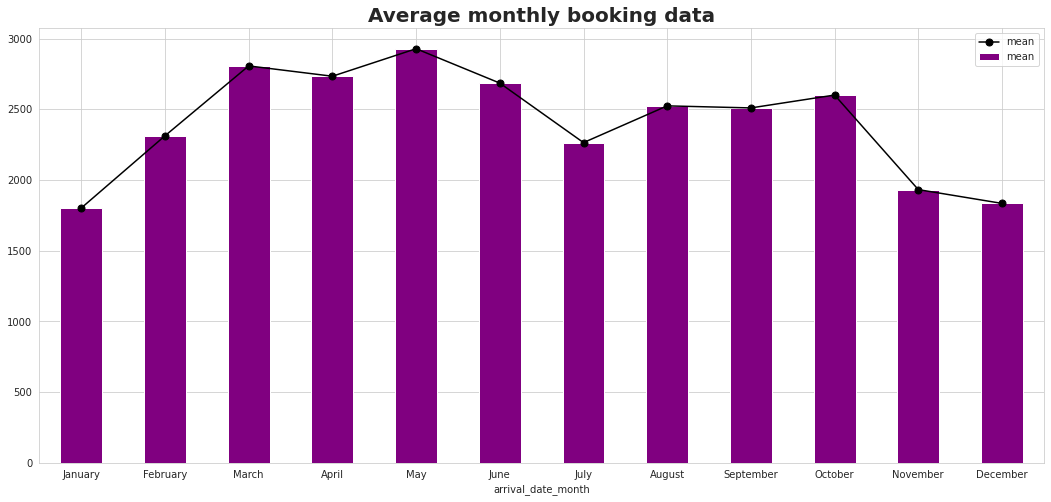

In [51]:
plt.figure(figsize = (18,8))

booked_data.loc[:,'mean'].plot(kind = 'bar', color = 'Purple')
booked_data.loc[:,'mean'].plot(kind = 'line',marker = '.' , color = 'black', ms = 14)

plt.title('Average monthly booking data')

plt.legend()
plt.show()


###**Inference:**
>The booking peaks twice a year, with the highest peak in May. The highest booking counts are observed in the months of March-June and in August-October.

### **Question 9: Countries from where the highest number of guests visit the hotels.**


In [52]:
#country representation of non-cancelled bookings
country_type = hotel_df['country'].value_counts().sort_values(ascending=False)
country_guests = country_type.reset_index().rename(columns={'index': 'country','country': 'guest_count'})
top_10_country= country_guests[:10]
top_10_country

,country,guest_count
0,PRT,17094
1,GBR,8418
2,FRA,7082
3,ESP,5367
4,DEU,4332
5,IRL,2346
6,ITA,1982
7,BEL,1668
8,NLD,1558
9,USA,1408


Text(0.5, 1.0, 'Top 10 countries from where the highest number of guests come')

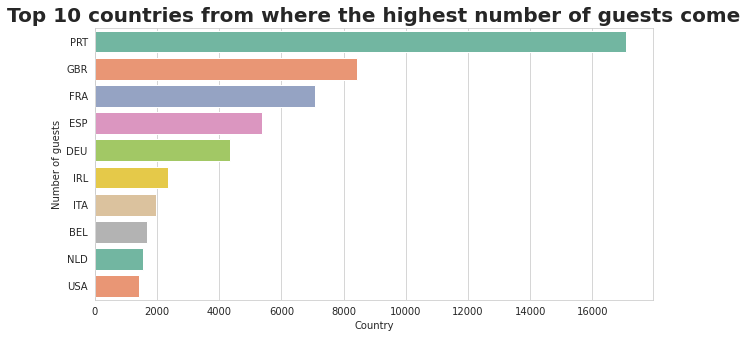

In [53]:
#plotting the graph
plt.figure(figsize=(10,5))
sns.barplot(x='guest_count',y='country',data=top_10_country, palette='Set2')
plt.xlabel('Country')
plt.ylabel('Number of guests')
plt.title("Top 10 countries from where the highest number of guests come")

###**Inference:**
> The highest number of guests for both hotels combined comes from Portugal, followed by Brazil, and France.

In [54]:
basemap = folium.Map()
country_guest_map = px.choropleth(country_guests,locations=country_guests['country'],
                          color = np.log(country_guests['guest_count']),hover_name=country_guests['country'],
                          color_continuous_scale = px.colors.sequential.Plasma,
                          title = "Countries of the Guests",width = 1080, height = 670
                          )

country_guest_map.show()

In [55]:
#countries with lowest bookings (non-cancelled) (<20)
bottom_country= country_guests[country_guests['guest_count'] < 20]
col_list = bottom_country["country"].values.tolist()
print(col_list)

['TUN', 'ECU', 'CRI', 'JOR', 'BLR', 'SAU', 'OMN', 'KAZ', 'NGA', 'PHL', 'VEN', 'MLT', 'CPV', 'IRQ', 'IDN', 'PRI', 'CMR', 'KWT', 'BIH', 'ALB', 'AZE', 'CUB', 'PAN', 'GNB', 'LBY', 'MKD', 'LKA', 'DOM', 'ARM', 'VNM', 'MUS', 'ARE', 'JAM', 'GEO', 'SUR', 'CAF', 'PAK', 'PRY', 'KEN', 'GIB', 'CIV', 'QAT', 'MNE', 'MDV', 'GTM', 'MCO', 'SYR', 'BGD', 'SEN', 'BOL', 'HKG', 'STP', 'COM', 'UZB', 'ZWE', 'AND', 'KNA', 'MWI', 'TGO', 'ETH', 'UGA', 'RWA', 'ABW', 'ATA', 'SLV', 'BRB', 'TMP', 'GAB', 'LAO', 'GHA', 'LIE', 'TZA', 'PLW', 'MDG', 'SYC', 'NAM', 'BHR', 'BFA', 'NPL', 'MLI', 'BHS', 'MAC', 'DMA', 'DJI', 'MMR', 'BDI', 'PYF', 'AIA', 'MRT', 'KIR', 'NCL', 'ASM', 'ZMB', 'SDN', 'TJK', 'BWA', 'SLE', 'LCA', 'CYM', 'GUY', 'SMR', 'ATF', 'FRO']


###**Inference:**
The above list of countries have the lowest guest count number for the hotels over the past few years. Hence, identifying them will help the hotels market themselves better in those countries and provide better deals.

### **Question 10: Top 10 booking agents.**

In [56]:
df_agent= df.groupby(['agent'])['agent'].agg({'count'}).reset_index().sort_values(by='count',ascending=False)

#Dropping the bookings which were booked without any agent
df_agent.drop(df_agent[df_agent['agent']==0].index,inplace=True)

#Top ten agent with highest bookings (including both cancelled and non-cancelled bookings)
top_ten_agent= df_agent[:10]
top_ten_agent

,agent,count
9,9.0,28662
174,240.0,12910
14,14.0,3330
7,7.0,3282
183,250.0,2767
175,241.0,1629
27,28.0,1476
8,8.0,1371
1,1.0,1227
6,6.0,1101


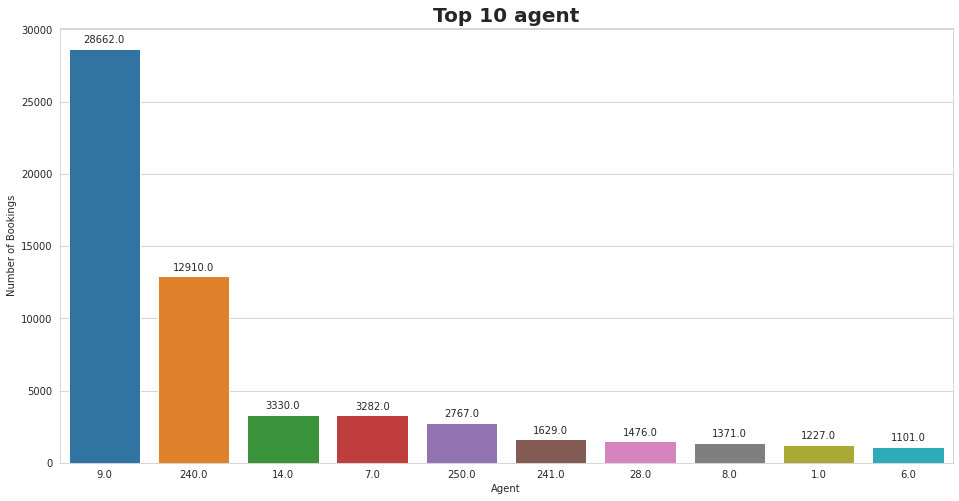

In [57]:
plt.figure(figsize=(16,8))
splot= sns.barplot(data= top_ten_agent, x='agent',y='count',order=top_ten_agent['agent'])
bar_graph_plot(splot)
plt.xlabel('Agent')
plt.ylabel('Number of Bookings')
plt.title("Top 10 agents")

###**Inference:**
The highest number of bookings are done by agencies/agents numbered 9, followed by agents 240 and 14.

In [58]:
#Agencies with the lowest booking counts (bookings < 20)
low_booking_agents = df_agent[df_agent['count'] < 20]
col_list = low_booking_agents["agent"].values.tolist()
print(col_list)

[262.0, 103.0, 327.0, 88.0, 308.0, 290.0, 77.0, 254.0, 348.0, 423.0, 249.0, 4.0, 368.0, 99.0, 390.0, 82.0, 23.0, 183.0, 385.0, 425.0, 151.0, 332.0, 187.0, 474.0, 502.0, 63.0, 455.0, 31.0, 24.0, 387.0, 205.0, 105.0, 296.0, 360.0, 170.0, 256.0, 111.0, 307.0, 126.0, 174.0, 354.0, 78.0, 393.0, 305.0, 50.0, 313.0, 495.0, 526.0, 411.0, 223.0, 324.0, 328.0, 192.0, 215.0, 110.0, 326.0, 193.0, 133.0, 276.0, 275.0, 74.0, 310.0, 139.0, 245.0, 163.0, 129.0, 459.0, 363.0, 270.0, 236.0, 81.0, 33.0, 509.0, 350.0, 508.0, 378.0, 72.0, 32.0, 325.0, 141.0, 252.0, 219.0, 492.0, 405.0, 210.0, 429.0, 214.0, 418.0, 92.0, 481.0, 344.0, 341.0, 359.0, 403.0, 148.0, 150.0, 112.0, 441.0, 364.0, 430.0, 244.0, 288.0, 287.0, 286.0, 335.0, 420.0, 426.0, 355.0, 258.0, 302.0, 535.0, 53.0, 182.0, 167.0, 180.0, 55.0, 235.0, 227.0, 391.0, 107.0, 404.0, 321.0, 41.0, 427.0, 211.0, 269.0, 476.0, 438.0, 454.0, 461.0, 384.0, 61.0, 60.0, 469.0, 484.0, 475.0, 64.0, 162.0, 414.0, 179.0, 303.0, 331.0, 135.0, 323.0, 453.0, 299.0, 7

###**Inference:**
>The above list of agencies/agents have the lowest booking number for the hotels over the past few years. Hence, identifying them will help the hotels make better deals with them by better marketing, offering lucrative rates, better booking experience, and better service to increase bookings from these agents. 

##**Conclusion:**

> In this kernel, we analysed the comprehensive data on hotel booking analysis and tried to unearth various insights from the data. We believe such insights will help hotels look at their past data and make better decisions in the future.We used the pandas library to do the analyses and used matplotlib, seaborn, and plotly to visualize the data. Here are what we inferred from the data:

*   Overall, 59.1 % people prefer city hotel and 40.9 % people prefer resort hotel.
*   Room type A is the most preferred room in both city and resort hotels.
*   City hotel has higher mean adr than resort hotels. Also, the adr of most of the room types vary a lot and is likely affected by different factors, like demand, time of year, guest count, and so on, which can be looked at further.
*   There is a positive correlation between cancelation and lead time, meaning higher the lead time, higher the changes that the booking will be canceled by the guest/agent.
*   Along with higher booking count, city hotels also have a higher cancellation rate than resort hotels (cancellation rate of city and resort hotels are 30.2 % and 23.7 %, respectively).
*   
*   The highest booking counts are observed in the months of March-June and in August-October.
*   Most of the guests are from Portugal.
*   Agent/Agency Number 9 has done the most number of bookings.
